# Using the Exponential Family


The logistic regression model can be derived from the Exponential family of probability distributions. The Exponential family of distributions is a general class of probability distributions that includes many common distributions, such as the normal, Poisson, and binomial distributions.

The logistic regression model is derived by assuming that the target variable follows a Bernoulli distribution, which is a member of the Exponential family. The Bernoulli distribution has only two possible outcomes, with probabilities p and 1-p. The probability mass function (pmf) of the Bernoulli distribution is given by:

$$p(y;p) = p^y(1-p)^{1-y}$$

where y is the outcome (0 or 1), and p is the probability of the outcome being 1.

To derive the logistic regression model, we assume that the Bernoulli probability p is a function of the input features x. This function can be written as:

$$p(x) = f(x\beta)$$

where f is a link function, x is the input features, and beta is a vector of parameters.

In logistic regression, the link function f is the logistic function, which is given by:

$$f(x) = \frac{1}{1 + e^{-x}}$$

This means that the probability p in the Bernoulli distribution is modeled as a logistic function of the input features x. The logistic regression model can then be written as:

$$p(x) = \frac{1}{1 + e^{-x\beta}}$$

where x is the input features, beta is a vector of parameters, and p is the probability that the target variable y is equal to 1. The logistic regression model can be fit to data by maximizing the likelihood of the data given the model, which is equivalent to minimizing the negative log likelihood of the data. This is the same approach used to fit other models in the Exponential family.

In summary, the logistic regression model can be derived from the Exponential family of probability distributions by assuming that the target variable follows a Bernoulli distribution and modeling the probability of the outcome being 1 as a logistic function of the input features. This allows the model to predict probabilities and be used for binary classification tasks



# Cross entropy

The cross-entropy loss function is derived from the concept of entropy in information theory. In binary classification problems, the entropy of a set of labels is calculated using the following equation:

$$H(y) = -p(y=1) \cdot \log(p(y=1)) - p(y=0) \cdot \log(p(y=0))$$


where p(y=1) is the probability of the positive class and p(y=0) is the probability of the negative class. This equation measures the amount of uncertainty or randomness in a set of labels. A low entropy indicates that the labels are highly predictable, while a high entropy indicates that the labels are less predictable.

The cross-entropy loss is then defined as the difference between the entropy of the true labels and the entropy of the predicted probabilities. This can be written as:

$$L(y, y_{pred}) = H(y) - H(y_{pred})$$
Using the definition of entropy, we can expand this equation to get:

$$L(y, y_{pred}) = -p(y=1) \cdot \log(p(y=1)) - p(y=0) \cdot \log(p(y=0)) - p(y_{pred}=1) \cdot \log(p(y_{pred}=1)) - p(y_{pred}=0) \cdot \log(p(y_{pred}=0))$$

If we define y_true as the true label and y_pred as the predicted probability, we can rewrite this equation as:

$$L(y_{true}, y_{pred}) = -y_{true} \cdot \log(y_{pred}) - (1 - y_{true}) \cdot \log(1 - y_{pred})$$
This is the equation for the cross-entropy loss that is commonly used in logistic regression and other binary classification algorithms. By minimizing this loss, we are able to find the set of weights that results in the best possible predictions on the training data

In [1]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, num_iterations=100, learning_rate=0.01, penalty=None, fit_intercept=True):
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.penalty = penalty
        self.fit_intercept = fit_intercept

    def logistic(self, x):
        return 1 / (1 + np.exp(-x))

    def model(self, x, w):
        return self.logistic(np.dot(x, w))

    def loss(self, y_true, y_pred):
        return (-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))).mean()

    def gradient(self, x, y_true, y_pred):
        return np.dot(x.T, y_pred - y_true) / len(y_true)

    def update(self, x, w, y_true, y_pred, learning_rate):
        if self.penalty == 'l1':
            w = w - learning_rate * self.gradient(x, y_true, y_pred)
            w[w < 0] = 0
        elif self.penalty == 'l2':
            w = w - learning_rate * self.gradient(x, y_true, y_pred) - 2 * w
        else:
            w = w - learning_rate * self.gradient(x, y_true, y_pred)

        return w

    def fit(self, X, Y):
        # Add a column of ones for the intercept
        if self.fit_intercept:
            X = np.c_[(np.ones((X.shape[0], 1)), X)]

        # Initialize the weights
        w = np.zeros(X.shape[1])

        # Loop over the number of iterations
        for i in range(self.num_iterations):
            # Compute the predicted probabilities
            y_pred = self.model(X, w)

            # Compute the loss
            l = self.loss(Y, y_pred)

            # Print the loss every 10 iterations
            if i % 100 == 0:
                print(f'Iteration {i}: Loss {l}')

            # Update the weights
            w = self.update(X, w, Y, y_pred, self.learning_rate)

        self.w = w

    def predict(self, X):
        if self.fit_intercept:
            X = np.c_[(np.ones((X.shape[0], 1)), X)]

        return self.model(X, self.w)


In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features=2,n_redundant=0,n_repeated=0,n_informative=2,n_clusters_per_class=1,
                          n_classes=2,random_state=1)

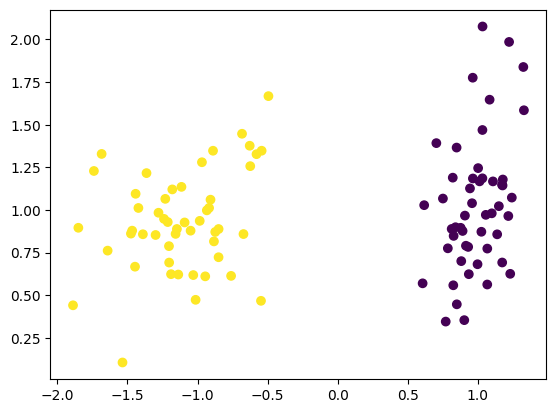

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
lr = LogisticRegressionScratch(num_iterations=1000,learning_rate=0.01,fit_intercept=True)
lr.fit(X,y)

Iteration 0: Loss 0.6931471805599453
Iteration 100: Loss 0.4836403778054387
Iteration 200: Loss 0.36260936219223994
Iteration 300: Loss 0.2873571461618231
Iteration 400: Loss 0.23712812376517192
Iteration 500: Loss 0.20159342967068664
Iteration 600: Loss 0.17527030182313344
Iteration 700: Loss 0.155046984054848
Iteration 800: Loss 0.1390492567006842
Iteration 900: Loss 0.12608965576239464


In [5]:
lr.w

array([-0.00925468, -2.13694733, -0.05143972])

In [6]:
def plot_decision_boundary(X,y, w):

    # X --> Inputs
    # w --> weights

    x1 = np.array([min(X[:,0]), max(X[:,0])])
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c

    # Plotting
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

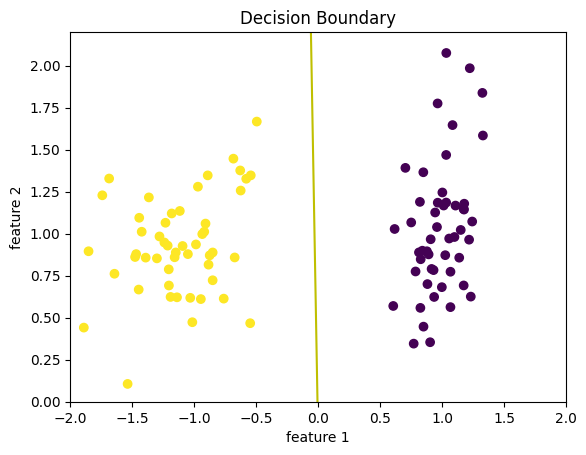

In [7]:
plot_decision_boundary(X,y,lr.w)

In [8]:
from sklearn.linear_model import LogisticRegression
sklearn_lr = LogisticRegression(max_iter=1000,C=0.01,fit_intercept=True)
sklearn_lr.fit(X,y)

LogisticRegression(C=0.01, max_iter=1000)

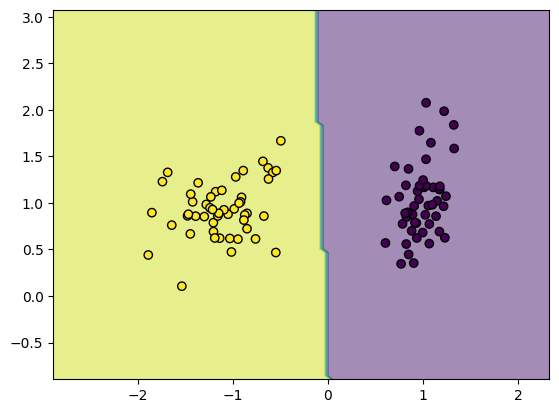

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(estimator=sklearn_lr,X=X,response_method="predict",alpha=0.5)
disp.ax_.scatter(X[:,0],X[:,1],c=y,edgecolor="k")
plt.show()

In [10]:
sklearn_lr.score(X,y)

1.0

# Imbalance data

## Impact of Imbalance data

1. The classifier may be biased towards the majority class, and may not perform well on the minority class.
2. The classifier may over fit to the majority class, and may not generalize well to new examples.
3. The performance of the classifier may be evaluated using an inappropriate metric, such as accuracy, which can be biased towards the majority class.
4. The classifier may be less efficient, because it may have to process more examples from the majority class than from the minority class.

# Ways to handle the Imbalance data

1. Oversampling: This involves increasing the number of examples in the minority class by generating synthetic examples using methods such as SMOTE (Synthetic Minority Over-sampling Technique).

2. Undersampling: This involves decreasing the number of examples in the majority class by removing some examples.

3. Use a different performance metric: Instead of using accuracy, which can be biased towards the majority class in imbalanced data, you can use a different evaluation metric such as the F1 score, which is the harmonic mean of precision and recall. This metric can give a more balanced view of the performance of the classifier by taking into account both false positive and false negative errors.

4. Use class weights: Some classification algorithms, such as support vector machines and decision trees, allow you to specify different weights for each class. This can help to balance the impact of the different classes on the model, and can improve the performance of the classifier on imbalanced data.

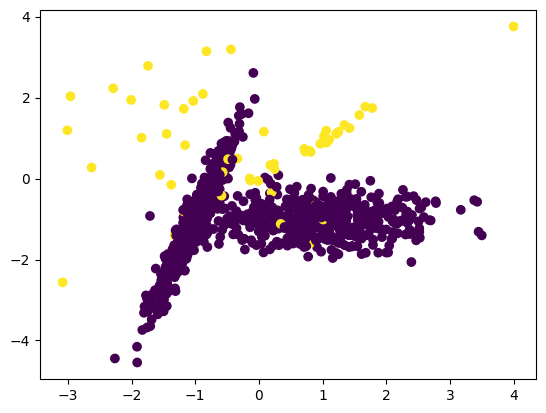

In [11]:
# Generate the imbalanced data
X, y = make_classification(n_samples=1000, n_features=2,n_repeated=0,n_redundant=0,n_classes=2, weights=[0.95, 0.05], random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)

In [12]:
np.bincount(y)

array([944,  56], dtype=int64)

In [13]:
sklearn_lr = LogisticRegression(max_iter=1000,fit_intercept=True,C=0.1)
sklearn_lr.fit(X,y)

LogisticRegression(C=0.1, max_iter=1000)

In [14]:
scratch_lr = LogisticRegressionScratch(num_iterations=1000,fit_intercept=True,learning_rate=0.1)
scratch_lr.fit(X,y)

Iteration 0: Loss 0.6931471805599454
Iteration 100: Loss 0.16971704425759498
Iteration 200: Loss 0.15014175092701554
Iteration 300: Loss 0.1451679842554853
Iteration 400: Loss 0.1433944580139347
Iteration 500: Loss 0.14265886991144605
Iteration 600: Loss 0.14232644286118898
Iteration 700: Loss 0.14216779336435992
Iteration 800: Loss 0.14208923853747205
Iteration 900: Loss 0.1420493273656694


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y,sklearn_lr.predict(X)),accuracy_score(y,np.where(scratch_lr.predict(X)<0.5,0,1))

(0.952, 0.951)

In [16]:
from sklearn.metrics import f1_score
f1_score(y,sklearn_lr.predict(X)),f1_score(y,np.where(scratch_lr.predict(X)<0.5,0,1))

(0.3142857142857143, 0.36363636363636365)

### Using the Synthetic Minority oversampling techniques


In [17]:
X.shape,y.shape

((1000, 2), (1000,))

In [18]:
np.bincount(y)

array([944,  56], dtype=int64)

In [19]:
from imblearn.over_sampling import SMOTE

over_sampler = SMOTE()

sample_X ,sample_y = over_sampler.fit_resample(X,y)

sample_X.shape,sample_y.shape

((1888, 2), (1888,))

In [20]:
np.bincount(sample_y)

array([944, 944], dtype=int64)

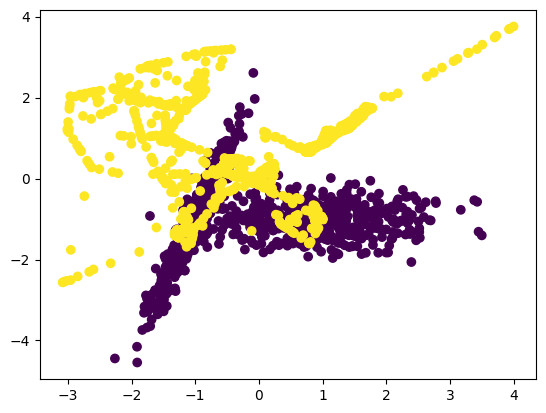

In [21]:
plt.scatter(sample_X[:,0],sample_X[:,1],c = sample_y)
plt.show()

In [22]:
# after the over sampled
sklearn_lr = LogisticRegression(max_iter=1000,fit_intercept=True,C=0.1)
sklearn_lr.fit(sample_X,sample_y)

LogisticRegression(C=0.1, max_iter=1000)

In [23]:
accuracy_score(sample_y,sklearn_lr.predict(sample_X))

0.8522245762711864

In [24]:
f1_score(sample_y,sklearn_lr.predict(sample_X))

0.8504021447721181

### Handling the imbalanced data using the class weight

In [25]:
counts = np.bincount(y)

In [26]:
class_weights = {0:counts[0]/counts[1],1:15}

In [27]:
sklearn_lr = LogisticRegression(max_iter=1000,fit_intercept=True,C=0.1,class_weight=class_weights)
sklearn_lr.fit(X,y)

LogisticRegression(C=0.1, class_weight={0: 16.857142857142858, 1: 15},
                   max_iter=1000)

In [28]:
accuracy_score(y,sklearn_lr.predict(X))

0.952

In [29]:

f1_score(y,sklearn_lr.predict(X))

0.3684210526315789

#### Proper way to choose the class weight

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_ind = le.fit_transform(y)
len(y) / (len(le.classes_) * np.bincount(y_ind).astype(np.float64))


array([0.52966102, 8.92857143])

In [31]:
from sklearn.utils.class_weight import compute_class_weight

In [32]:
class_weights = compute_class_weight("balanced",classes=np.unique(y),y=y)
class_weights = dict(zip(np.unique(y),class_weights))
class_weights

{0: 0.5296610169491526, 1: 8.928571428571429}

In [33]:
sklearn_lr = LogisticRegression(max_iter=1000,fit_intercept=True,C=0.1,class_weight=class_weights)
sklearn_lr.fit(X,y)

LogisticRegression(C=0.1,
                   class_weight={0: 0.5296610169491526, 1: 8.928571428571429},
                   max_iter=1000)

In [34]:
accuracy_score(y,sklearn_lr.predict(X))

0.851

In [35]:
f1_score(y,sklearn_lr.predict(X))

0.37656903765690375

## Ways to handle the Outlier

### Transforming the data

Transform the predictors or response variable to reduce the influence of the outliers.

In [36]:
from sklearn.datasets import make_classification
import numpy as np

# Generate data with 2 predictors, 1 class, class_sep of 0.8, and scale of 2.0
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, flip_y=0, class_sep=1.0,
                           hypercube=True, shift=0.0, scale=1.0,
                           shuffle=True, random_state=1234)


In [37]:
rnd_idx = np.random.choice(len(X),size=1,replace=False)
X[rnd_idx] = [10,5]

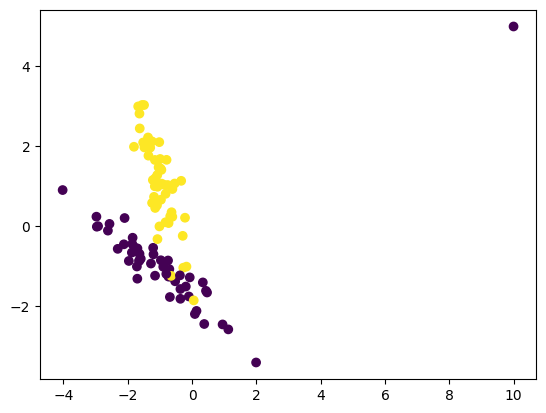

In [38]:
plt.scatter(X[:,0],X[:,1],c=y)

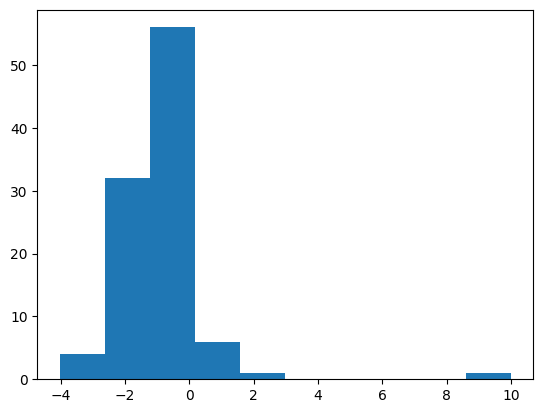

In [39]:
import matplotlib.pyplot as plt

# Histogram of the first predictor
plt.hist(X[:, 0])
plt.show()


In [40]:
lr_outlier = LogisticRegression(solver="lbfgs",penalty="none")
lr_outlier.fit(X,y)
lr_outlier.score(X,y)

0.91

In [41]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method="yeo-johnson")
X_transformed = transformer.fit_transform(X)

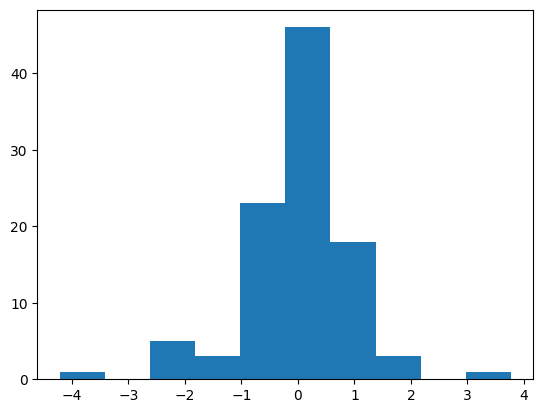

In [42]:
import matplotlib.pyplot as plt

# Histogram of the first predictor
plt.hist(X_transformed[:, 0])
plt.show()


In [43]:
lr_transformed = LogisticRegression()
lr_transformed.fit(X_transformed,y)
lr_transformed.score(X_transformed,y)

0.94

**How transformation reduce the influence of outlier?**

Transforming the predictors or response variable in a logistic regression model can reduce the influence of outliers by changing the shape of the data distribution. For example, if the data is skewed and contains a few extreme values (i.e. outliers), applying a log transformation to the predictors or response variable can make the data more symmetrical and reduce the influence of the extreme values.

## Remove the outlier

In [44]:
from sklearn.covariance import EllipticEnvelope

outlier_detector = EllipticEnvelope()
outlier_detector.fit(X)
outlier = X[outlier_detector.predict(X) == -1]
inlier = outlier_detector.predict(X) == 1

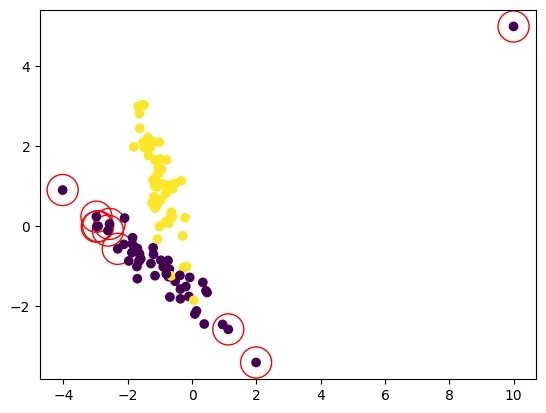

In [45]:
plt.scatter(outlier[:,0],outlier[:,1],s=500,edgecolors="r",facecolors="none")
plt.scatter(X[:,0],X[:,1],c=y)

In [46]:
lr_outlier = LogisticRegression(solver="lbfgs")
lr_outlier.fit(X[inlier],y[inlier])

LogisticRegression()

In [47]:
lr_outlier.score(X[inlier],y[inlier])

0.9444444444444444